# 숫자 분류 모델 제작
- 입력은 흰 바탕에 빨간색으로 숫자가 적힌 이미지
- mnist 데이터셋을 변형하여 학습함

In [8]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

## 데이터 가져오기

In [9]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 데이터 살펴보기

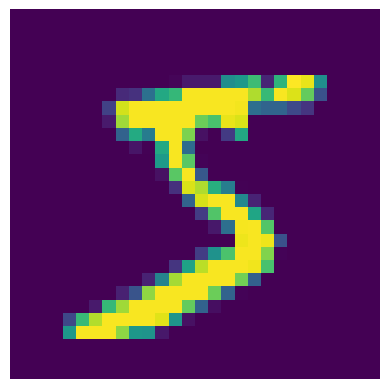

In [10]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

## 모델 구성

In [11]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM

kernel_size = (3, 3)

model = Sequential([
    LSTM(128, input_shape=(28, 28), return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 220874 (862.79 KB)
Trainable params: 22087

## 모델 학습
- 검증 데이터 기준 98% 정확도

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/5
469/469 - 31s - loss: 0.3851 - accuracy: 0.8794 - val_loss: 0.1349 - val_accuracy: 0.9596 - 31s/epoch - 67ms/step
Epoch 2/5
469/469 - 28s - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.0886 - val_accuracy: 0.9731 - 28s/epoch - 60ms/step
Epoch 3/5
469/469 - 28s - loss: 0.0921 - accuracy: 0.9732 - val_loss: 0.0805 - val_accuracy: 0.9755 - 28s/epoch - 59ms/step
Epoch 4/5
469/469 - 27s - loss: 0.0731 - accuracy: 0.9781 - val_loss: 0.0879 - val_accuracy: 0.9741 - 27s/epoch - 58ms/step
Epoch 5/5
469/469 - 27s - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.0695 - val_accuracy: 0.9785 - 27s/epoch - 57ms/step


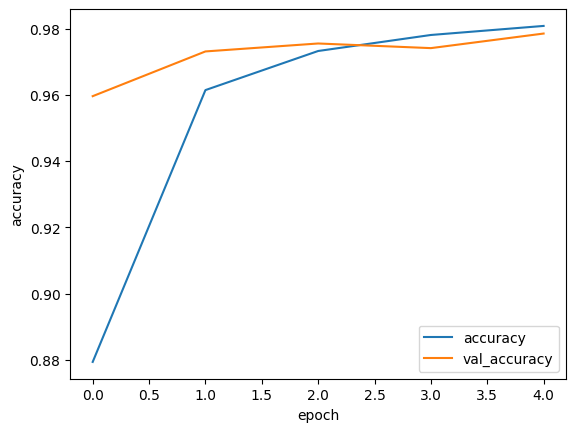

In [14]:
# draw accuracy and val_accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 모델 저장

In [17]:
model.save("../model.keras")